In [8]:
%matplotlib inline

In [10]:
import starry

starry.config.lazy = False
starry.config.quiet = True

In [11]:
def load(map, image):
    """
    Loads an image file into the map.
    
    """
    import numpy as np
    from PIL import Image
    from matplotlib.image import pil_to_array
    import os

    # If image doesn't exist, check for it in `img` directory
    if not os.path.exists(image):
        dn = os.path.dirname
        image = os.path.join(os.path.dirname(os.path.abspath(starry.__file__)), "img", image)
        if not image.endswith(".jpg"):
            image += ".jpg"
        if not os.path.exists(image):
            raise ValueError("File not found: %s." % image)

    # Get the image array
    grayscale_pil_image = Image.open(image).convert("L")
    image_array = pil_to_array(grayscale_pil_image)
    image_array = np.array(image_array, dtype=float)
    image_array /= 255.0

    # Get the image coords
    lat = np.linspace(-90, 90, image_array.shape[0])[::-1]
    lon = np.linspace(-180, 180, image_array.shape[1])
    lon, lat = np.meshgrid(lon, lat)
    lat = lat.flatten()
    lon = lon.flatten()
    
    # Solve the linear problem
    A = map.intensity_design_matrix(lat, lon)
    try:
        A = A.eval()
    except AttributeError:
        pass
    y = np.linalg.solve(A.T @ A + 1e-8 * np.eye(map.Ny), A.T @ image_array.flatten())
    
    # Ingest the coefficients
    map._y = map._math.cast(y / y[0])
    map.amp = map._math.cast(y[0] * np.pi)

In [12]:
map = starry.Map(10)

In [13]:
load(map, "earth")

AttributeError: 'Map' object has no attribute '_math'

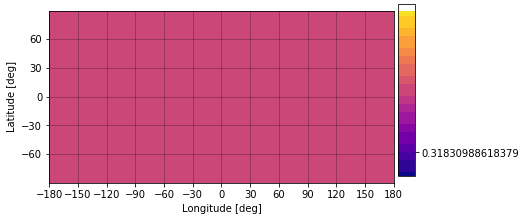

In [14]:
map.show(projection="rect", colorbar=True)